In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
train_df = pd.read_csv('WineDataset.csv')
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic Acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    float64
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    float64
 13  Wine 

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity of ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280/OD315 of diluted wines'}>],
       [<Axes: title={'center': 'Proline'}>,
        <Axes: title={'center': 'Wine'}>, <Axes: >, <Axes: >]],
      dtype=object)

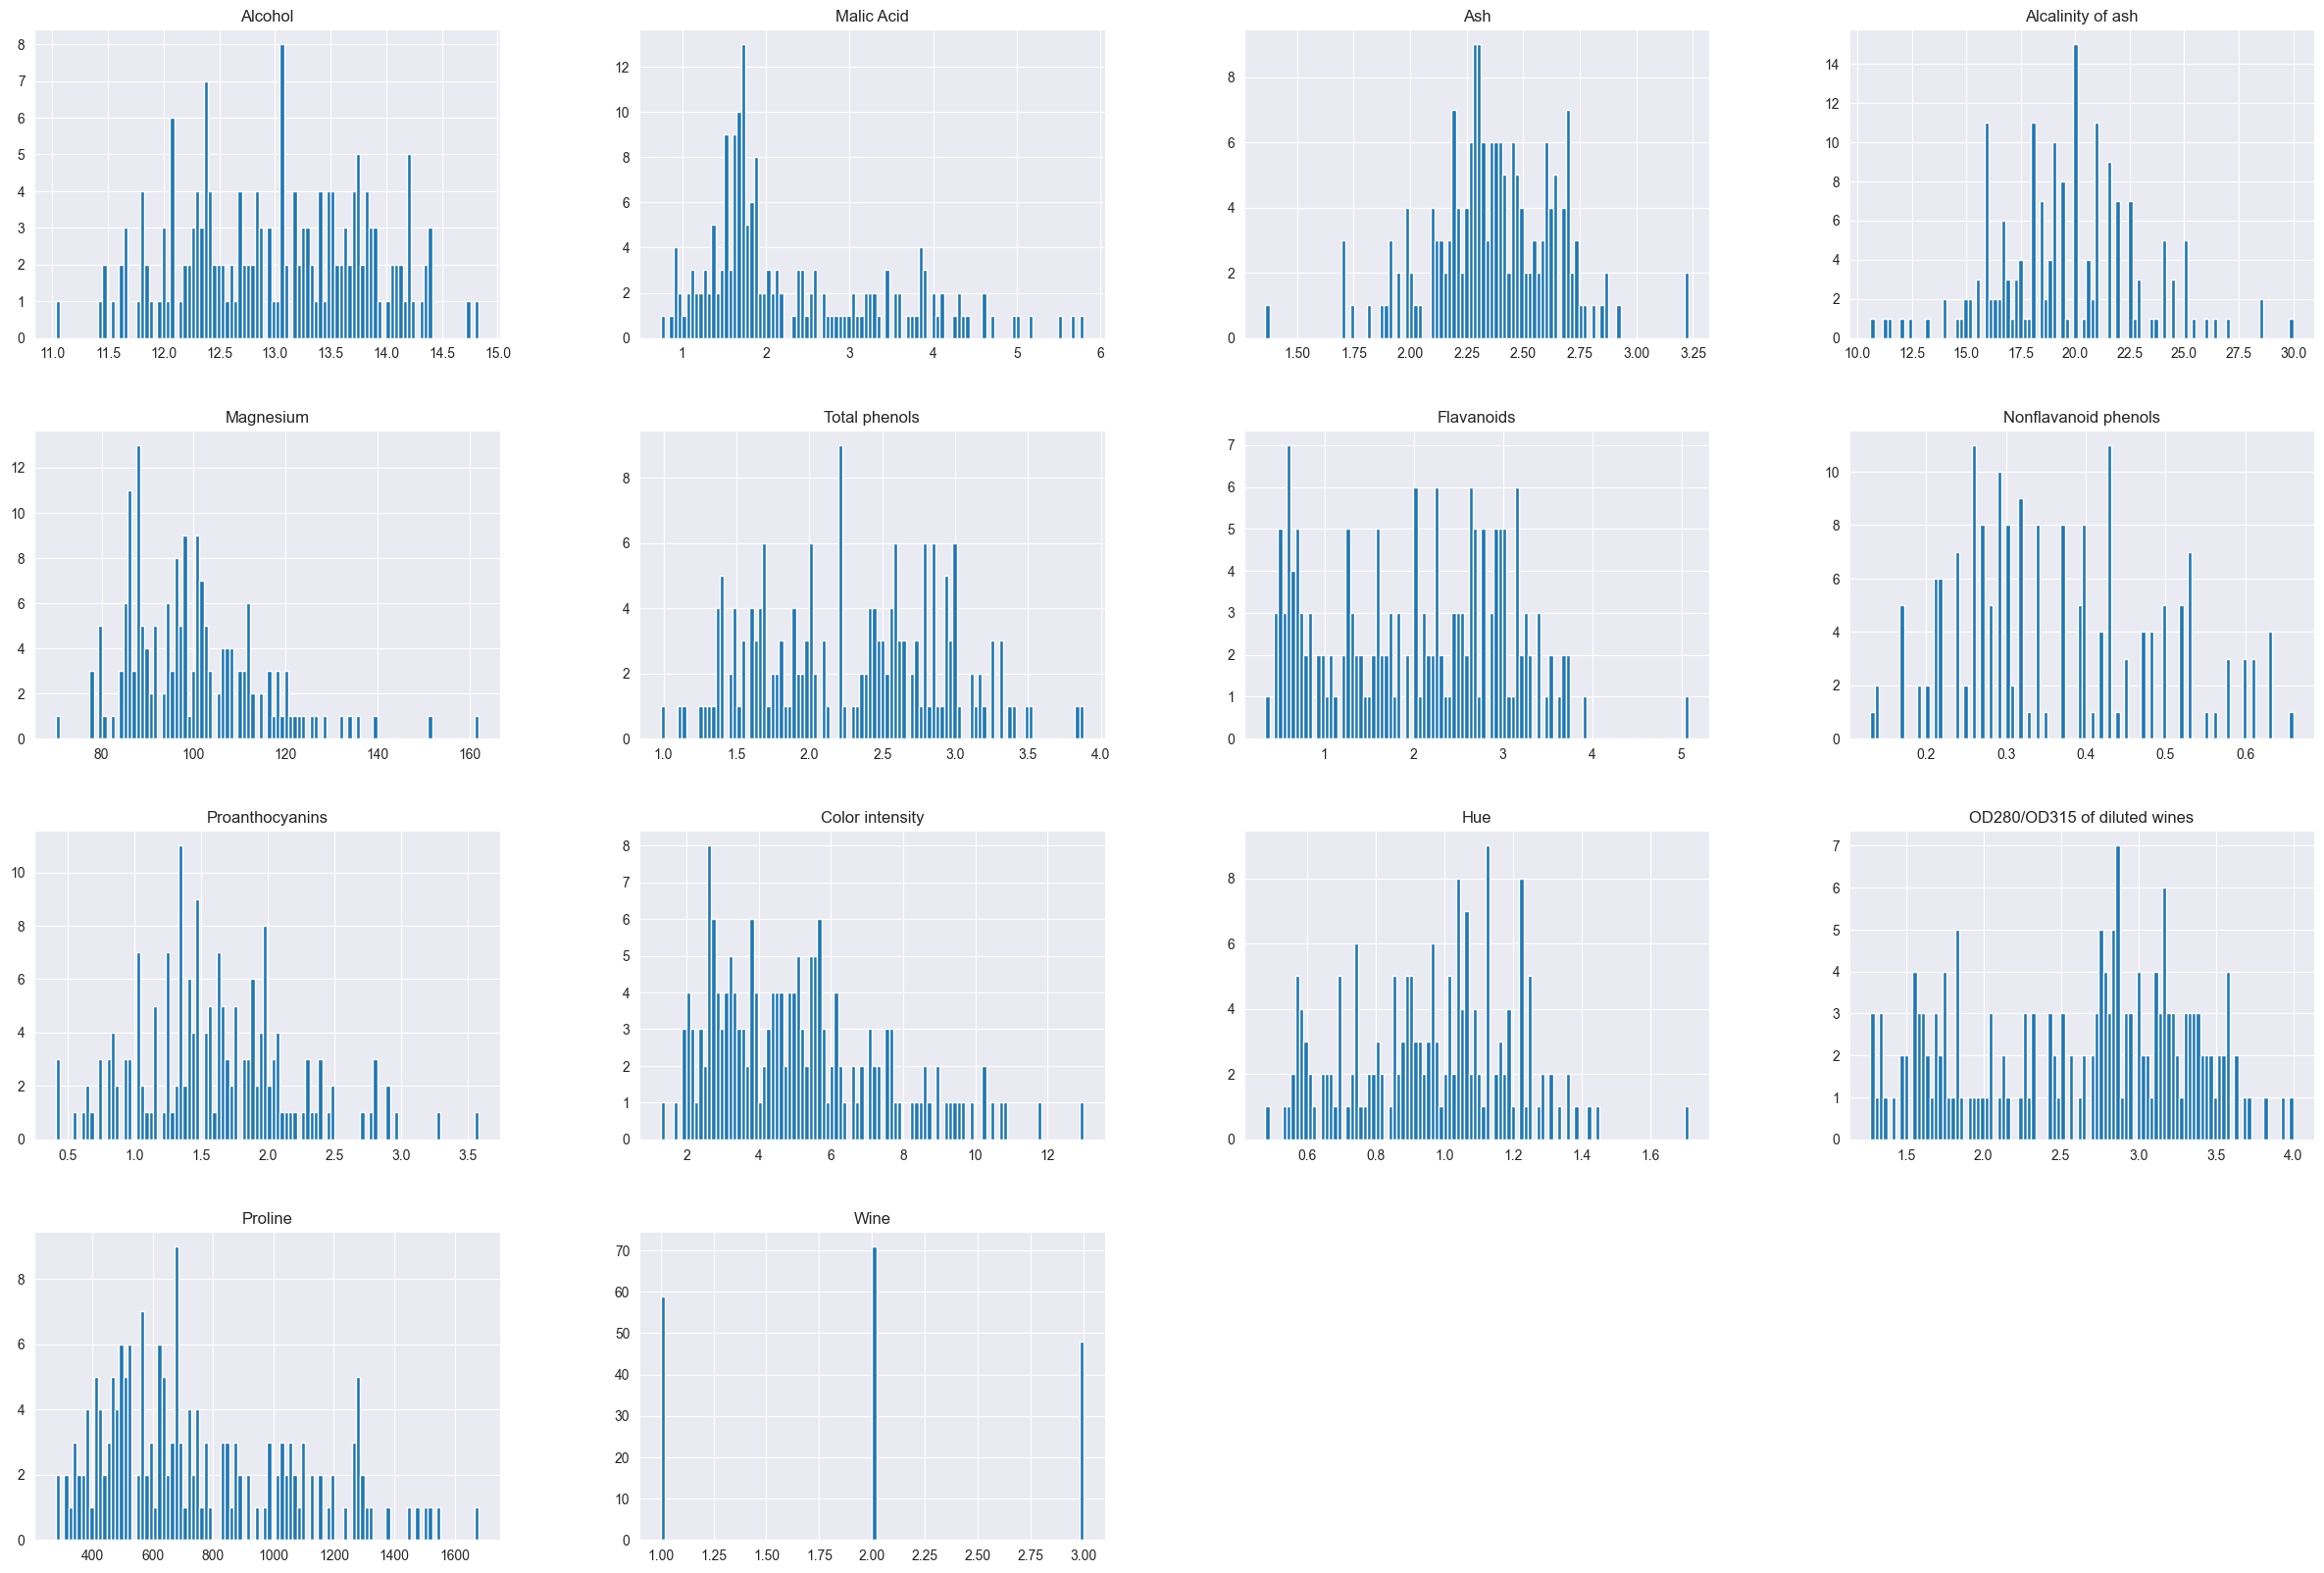

In [4]:
train_df.hist(bins=100, figsize=(30, 20))

<h3>Train Test split</h3>

In [5]:
train_percentage = 0.8
random_state = 336771

train = train_df.sample(frac=train_percentage, random_state=random_state)
test = train_df.drop(train.index)

train_x = train.drop('Wine', axis=1)
train_y = train['Wine']

print(train_y.value_counts())

test_x = test.drop('Wine', axis=1)
test_y = test['Wine']

print(test_y.value_counts())

Wine
2    56
1    49
3    37
Name: count, dtype: int64
Wine
2    15
3    11
1    10
Name: count, dtype: int64


<h2>Normalize</h2>

In [6]:
for col in train_x.columns:
    min_x = train_x[col].min()
    max_x = train_x[col].max()
    train_x[col] = (train_x[col] - min_x) / (max_x - min_x)
    test_x[col] = (test_x[col] - min_x) / (max_x - min_x)
train_x.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.466786,0.313046,0.535023,0.456766,0.273223,0.448252,0.358501,0.421452,0.368663,0.360076,0.492421,0.488934,0.336049
std,0.226805,0.228064,0.152706,0.172258,0.172238,0.214049,0.207867,0.233453,0.176099,0.215442,0.227112,0.266297,0.226258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280702,0.165020,0.454545,0.331186,0.133929,0.280172,0.187236,0.250000,0.264984,0.182426,0.322165,0.213370,0.158345
50%,0.479532,0.211462,0.534759,0.432990,0.238095,0.443103,0.375527,0.346154,0.358044,0.325692,0.510309,0.558608,0.284237
75%,0.658626,0.462945,0.640374,0.561856,0.375000,0.623276,0.513713,0.557692,0.474763,0.478271,0.659794,0.692308,0.506954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
test_x.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.458415,0.325099,0.550951,0.465349,0.202050,0.474138,0.348043,0.447115,0.387750,0.363897,0.491409,0.501425,0.328123
std,0.278691,0.191951,0.121221,0.173952,0.150113,0.224514,0.224530,0.263774,0.199084,0.246861,0.270208,0.237142,0.221028
min,-0.111111,0.065217,0.331551,0.041237,-0.095238,0.144828,0.033755,-0.019231,0.044164,0.043935,0.061856,0.087912,0.008559
25%,0.241959,0.183794,0.471925,0.375000,0.104167,0.238793,0.098101,0.206731,0.260252,0.187202,0.275773,0.284799,0.171719
50%,0.453216,0.304348,0.521390,0.484536,0.160714,0.506897,0.382911,0.490385,0.381703,0.321872,0.458763,0.549451,0.272468
75%,0.687865,0.449111,0.627005,0.561856,0.285714,0.651724,0.561181,0.649038,0.500000,0.429322,0.667526,0.707875,0.438837
max,0.976608,0.764822,0.834225,0.793814,0.595238,0.875862,0.719409,0.903846,0.788644,1.119389,1.268041,0.868132,0.878745


<h2>k ближайших соседей</h2>

In [8]:
class KNN:
    def __init__(self, k: int, col_names: list[str]):
        self.k = k
        self.col_names = col_names

    def train(self, x, y):
        self.x = np.array(x[self.col_names])
        self.y = np.array(y)

    def pred(self, x):
        x = np.array(x[self.col_names])
        ans = []

        for row in x:
            # Рассчитываем расстояния между x и всеми точками обучающего набора
            distances = np.linalg.norm(self.x - row, axis=1)
            # Получаем индексы k ближайших соседей
            k_indexes = np.argsort(distances)[:self.k]
            # Извлекаем метки этих соседей
            k_classes = self.y[k_indexes]
            classes, counts = np.unique(k_classes, return_counts=True)
            # Определяем класс, который встречается чаще всего среди соседей
            winner = classes[np.argsort(counts)[0]]
            ans.append(winner)

        return np.array(ans)

In [9]:
def error_matrix(pred_y, true_y, n):
    res = np.zeros((n, n))
    for pred, true in zip(pred_y, true_y):
        res[int(pred), true] += 1

    return res


def show_matrix(axis, pred_y, true_y, n):
    res = error_matrix(pred_y, true_y, n)
    axis.matshow(res)
    axis.set_xlabel('True class')
    axis.set_ylabel('Predicted class')

    for (v, h), z in np.ndenumerate(res):
        axis.text(h, v, str(int(z)), ha='center', va='center')

<h2>Random features</h2>
Чем интенсивнее цвет (например, чем более темный), тем больше объектов в этой комбинации. Это помогает визуализировать, как модель классификации справляется с различными классами.

Случайно выбраны столбцы:
 Total phenols
Alcalinity of ash
Nonflavanoid phenols


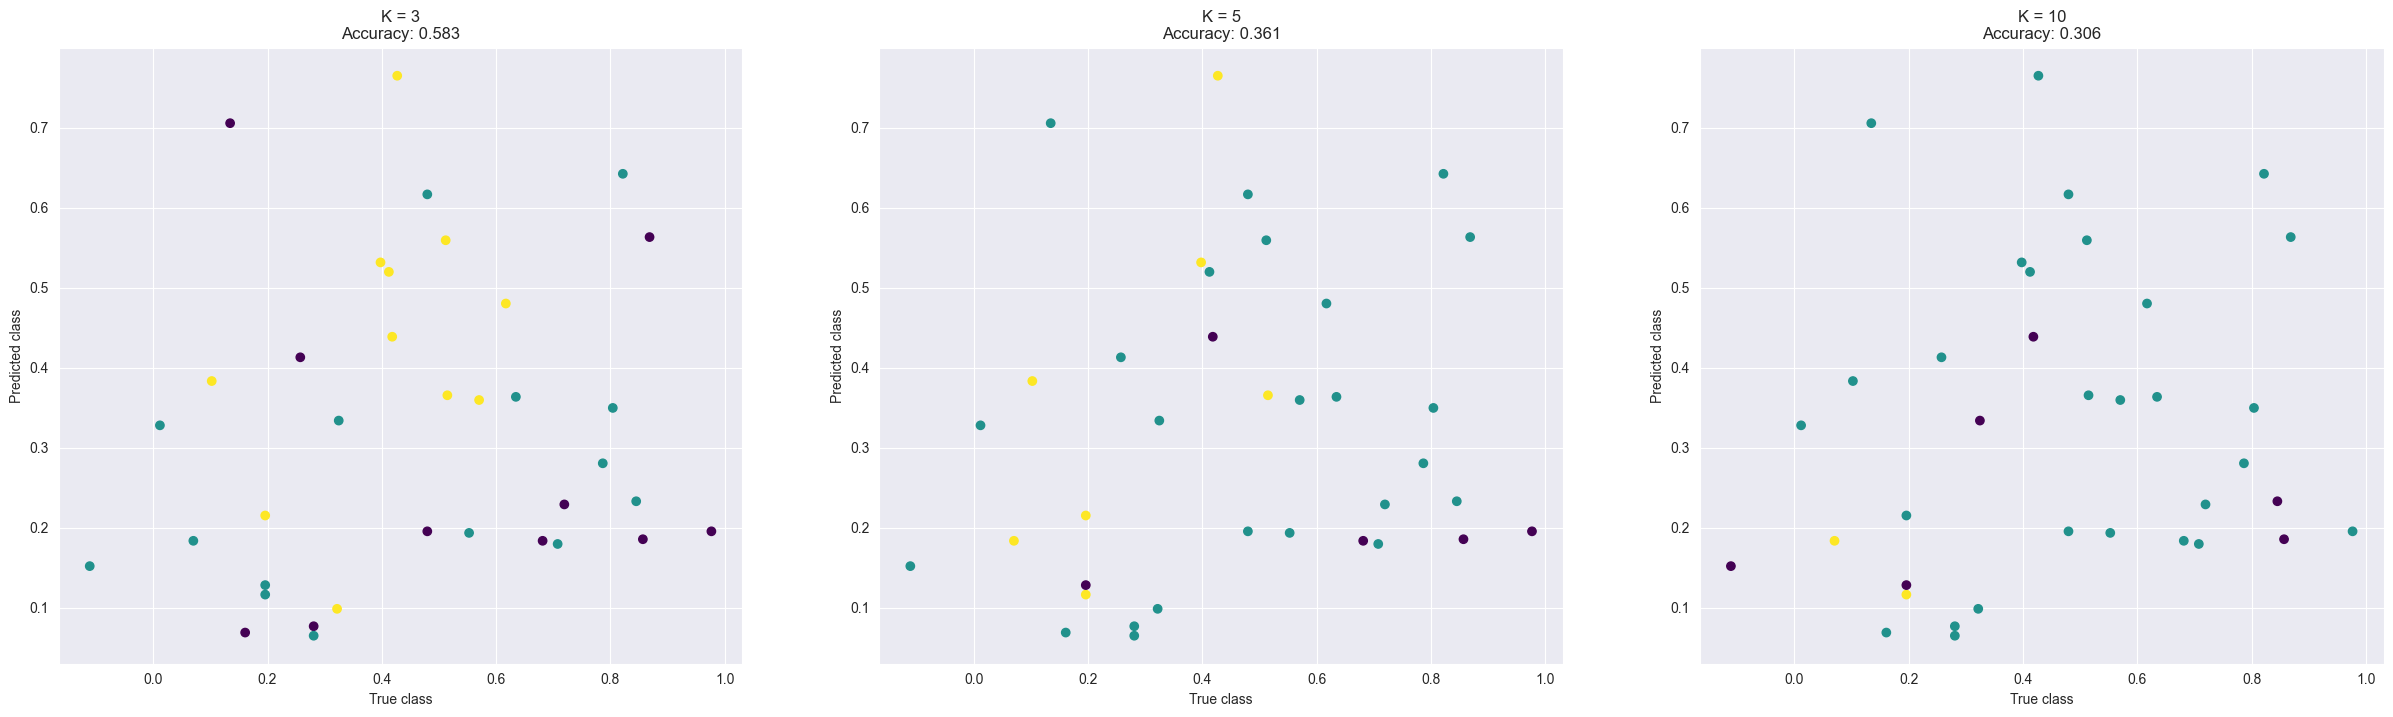

In [10]:
from sklearn.metrics import accuracy_score

col_names = np.random.choice(train_x.columns, size=np.random.randint(1, len(train_x.columns)), replace=False)
print('Случайно выбраны столбцы:\n', '\n'.join(col_names))

plt.figure(figsize=(30, 8))

for i, k in enumerate([3, 5, 10], 1):
    knn = KNN(k, col_names)
    knn.train(train_x, train_y)
    pred_y = knn.pred(test_x)

    plt.subplot(1, 3, i)
    plt.scatter(test_x.values[:, 0], test_x.values[:, 1], c=pred_y, cmap='viridis')
    accuracy_model1 = accuracy_score(test_y, pred_y)
    
    plt.title(f'K = {k}\nAccuracy: {accuracy_model1:.3f}')
    plt.xlabel('True class')
    plt.ylabel('Predicted class')

<h3>Полученные в следующем блоке данные позволяют проверить, насколько точно были проведены рассчеты вручную</h3>

In [15]:
# from sklearn.metrics import confusion_matrix
# 
# confusion_matrix_model2 = confusion_matrix(test_y, pred_y)
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix_model2, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Предсказанный класс")
# plt.ylabel("Истинный класс")
# plt.title("Матрица ошибок для модели 1")
# plt.show()


<h3>Эти данные показывают количества правильных и неправильных классификаций в соответствующей ячейке, чтобы можно было наглядно видеть, сколько объектов было классифицировано правильно и неправильно для каждой комбинации истинных и предсказанных классов</h3>

Предсказанное значение: 2
Предсказанное значение: 2
Предсказанное значение: 2


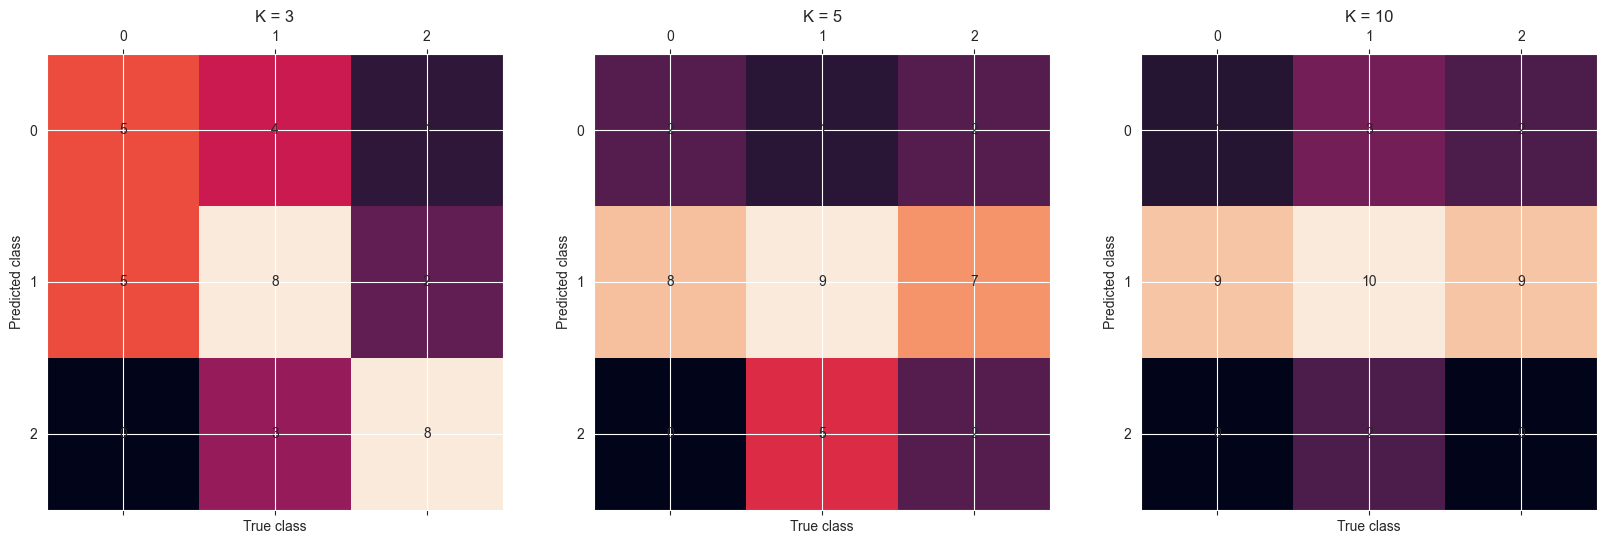

In [12]:
plt.figure(figsize=(20, 6))

for i, k in enumerate([3, 5, 10], 1):
    knn = KNN(k, col_names)
    knn.train(train_x, train_y)
    pred_y = knn.pred(test_x)
    print(f"Предсказанное значение: {np.argmax(np.bincount(pred_y))}")

    axis = plt.subplot(1, 3, i)
    axis.set_title('K = %d' % k)

    show_matrix(axis, pred_y - 1, test_y - 1, 3)

<h2>Selected features</h2>
All features are selected

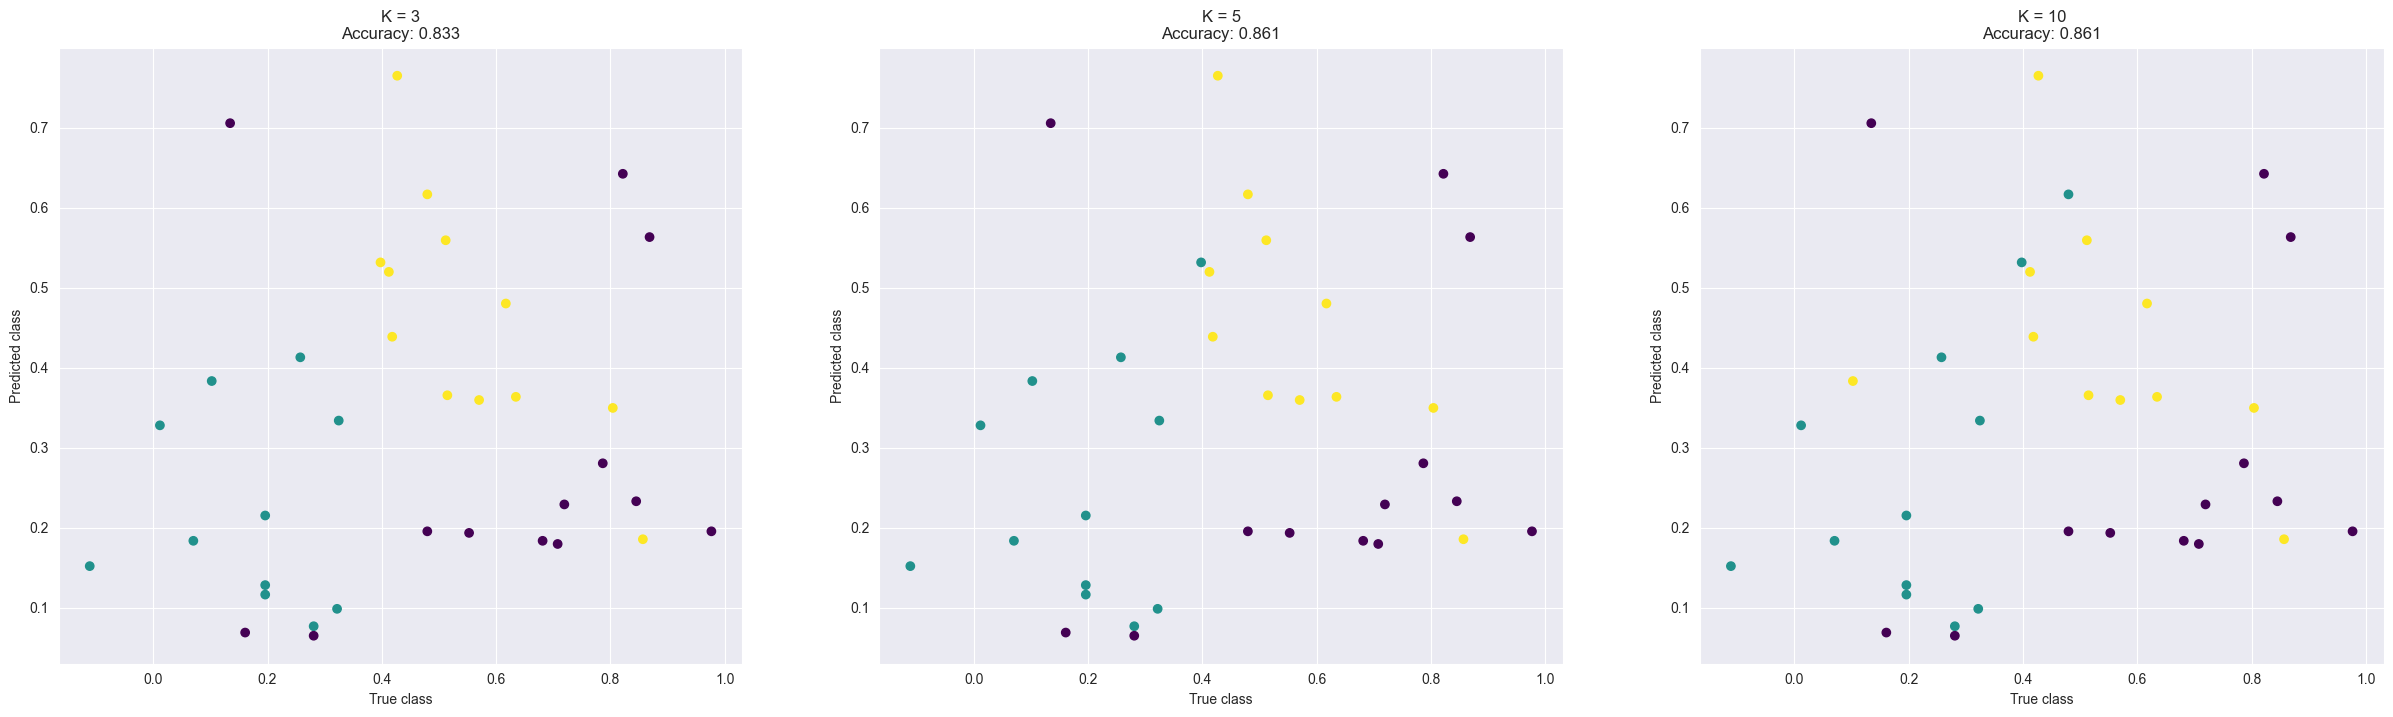

In [13]:
plt.figure(figsize=(30, 8))

for i, k in enumerate([3, 5, 10], 1):
    knn = KNN(k, train_x.columns)
    knn.train(train_x, train_y)
    pred_y = knn.pred(test_x)

    plt.subplot(1, 3, i)
    plt.scatter(test_x.values[:, 0], test_x.values[:, 1], c=pred_y, cmap='viridis')
    accuracy_model1 = accuracy_score(test_y, pred_y)
    
    plt.title(f'K = {k}\nAccuracy: {accuracy_model1:.3f}')
    plt.xlabel('True class')
    plt.ylabel('Predicted class')

Предсказанное значение: 1
Предсказанное значение: 1
Предсказанное значение: 1


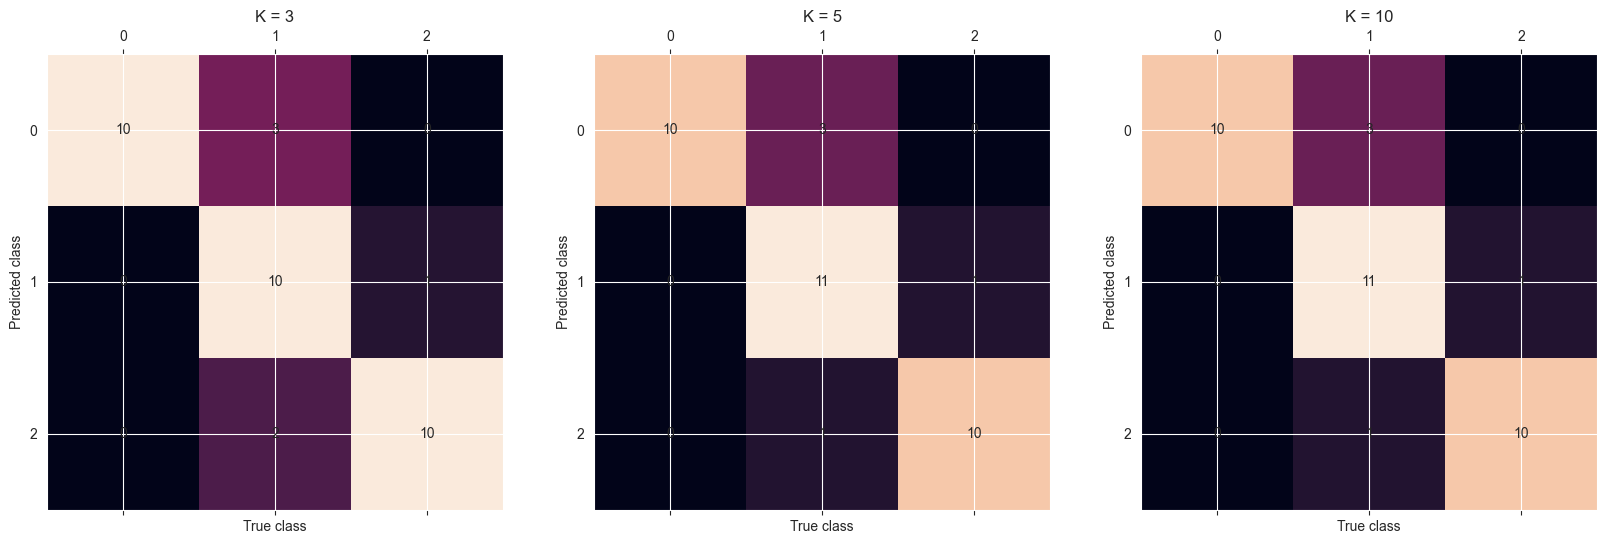

In [14]:
plt.figure(figsize=(20, 6))

for i, k in enumerate([3, 5, 10], 1):
    knn = KNN(k, train_x.columns)
    knn.train(train_x, train_y)
    pred_y = knn.pred(test_x)
    print(f"Предсказанное значение: {np.argmax(np.bincount(pred_y))}")
    
    axis = plt.subplot(1, 3, i)
    axis.set_title('K = %d' % k)

    show_matrix(axis, pred_y - 1, test_y - 1, 3)